In [25]:
import linear
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

# Датасет

In [26]:
weather_ds = pd.read_csv('datasets/weatherHistory.csv')

In [27]:
weather_ds.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [28]:
target = weather_ds['Temperature (C)']
weather_ds = weather_ds[['Precip Type', 'Humidity', 'Pressure (millibars)', 'Temperature (C)']]
weather_ds

,Precip Type,Humidity,Pressure (millibars),Temperature (C)
0,rain,0.89,1015.13,9.472222
1,rain,0.86,1015.63,9.355556
2,rain,0.89,1015.94,9.377778
3,rain,0.83,1016.41,8.288889
4,rain,0.83,1016.51,8.755556
...,...,...,...,...
96448,rain,0.43,1014.36,26.016667
96449,rain,0.48,1015.16,24.583333
96450,rain,0.56,1015.66,22.038889
96451,rain,0.60,1015.95,21.522222


In [29]:
weather_ds = pd.get_dummies(weather_ds, prefix='precip', columns=['Precip Type'])
weather_ds

,Humidity,Pressure (millibars),Temperature (C),precip_rain,precip_snow
0,0.89,1015.13,9.472222,1,0
1,0.86,1015.63,9.355556,1,0
2,0.89,1015.94,9.377778,1,0
3,0.83,1016.41,8.288889,1,0
4,0.83,1016.51,8.755556,1,0
...,...,...,...,...,...
96448,0.43,1014.36,26.016667,1,0
96449,0.48,1015.16,24.583333,1,0
96450,0.56,1015.66,22.038889,1,0
96451,0.60,1015.95,21.522222,1,0


In [77]:
X = weather_ds.drop(columns=['Temperature (C)'])
y = weather_ds['Temperature (C)']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Аналитическое решение

In [32]:
an_solution = linear.AnalyticalSolution()
an_solution.fit(X_train, y_train)
y_ = an_solution.predict(X_test)

In [33]:
from quality_functional import MSE, MAE
print(f'MSE = {MSE.get_loss(y_test, y_)}\nMAE = {MAE.get_loss(y_test, y_)}')

MSE = 38.07544175597628
MAE = 5.096169289228937


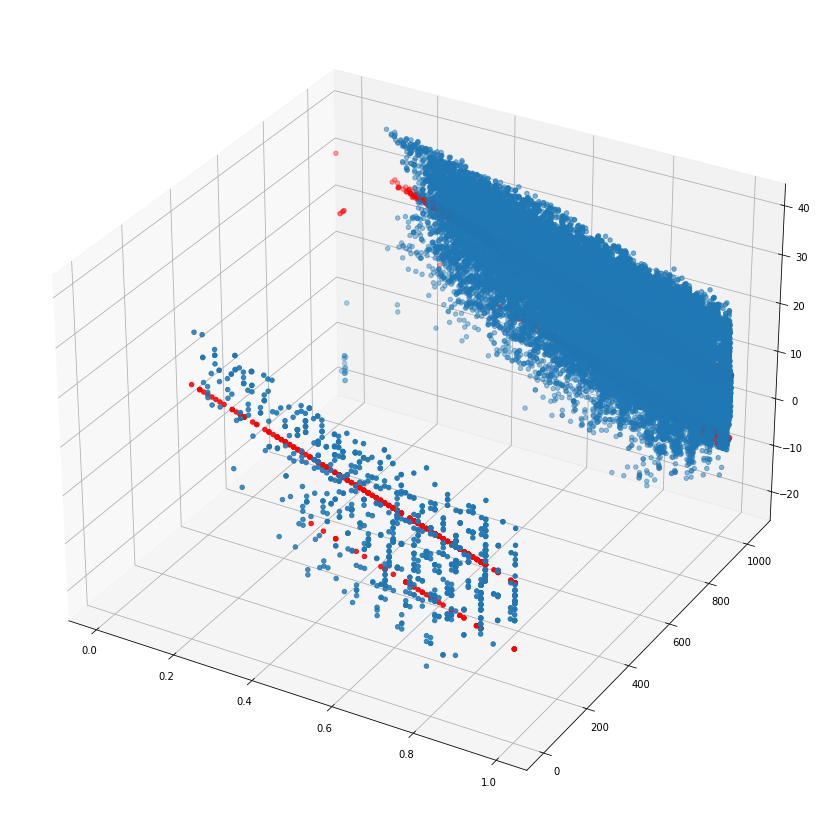

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs=X_train['Humidity'], ys=X_train['Pressure (millibars)'], zs=y_train)
ax.scatter(xs=X_test['Humidity'], ys=X_test['Pressure (millibars)'], zs=y_, c='red')
# ax.scatter(xs=X['Humidity'], ys=X['Pressure (millibars)'], zs=y, c='green')

Видно, что предсказания (красные точки) лежат в правильных "облаках".

# Градиентный спуск

Из-за фичи Pressure градиентный спуск расходился, регуляризация не помогла. Поэтому был дописан метод наискорейшнего спуска - когда мы выбираем оптимальный шаг alpha.
   

In [35]:
gd = linear.StandardGradientDescent(alpha=0.01, S=500, tolerance=1, descent_method='normalization_const', 
                                   reg_lmb=100, regularization='L2')
gd.fit(X_train, y_train)

In [36]:
y_ = gd.predict(X_test)

In [37]:
from quality_functional import MSE, MAE
print(f'MSE = {MSE.get_loss(y_test, y_)}\nMAE = {MAE.get_loss(y_test, y_)}')

MSE = 93.0225485172249
MAE = 7.964054860680482


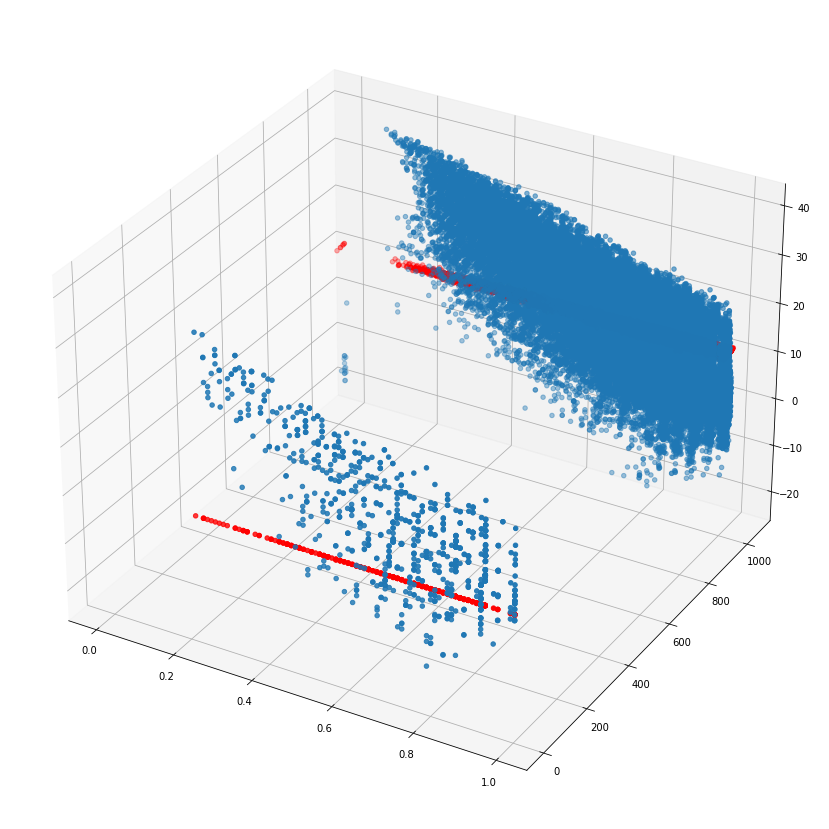

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs=X_train['Humidity'], ys=X_train['Pressure (millibars)'], zs=y_train)
ax.scatter(xs=X_test['Humidity'], ys=X_test['Pressure (millibars)'], zs=y_, c='red')
# ax.scatter(xs=X['Humidity'], ys=X['Pressure (millibars)'], zs=y, c='green')

Метод показал себя гораздо хуже аналитического решения, однако если убрать фичу Pressure то градиентный спуск все же сходится к оптимуму 

In [39]:
X = weather_ds.drop(columns=['Temperature (C)', 'Pressure (millibars)'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
gd = linear.StandardGradientDescent(alpha=0.1, S =600)
gd.fit(X_train, y_train)
y_ = gd.predict(X_test)

print(f'MSE = {MSE.get_loss(y_test, y_)}\nMAE = {MAE.get_loss(y_test, y_)}')

MSE = 38.8928989867132
MAE = 5.176040760319718


Попробуем отнормировать саму фичу

In [79]:
from data import normalize_columns
weather_ds = weather_ds.rename(columns={'Pressure (millibars)': 'Pressure'})
normalize_columns(weather_ds, columns=['Pressure'])

MSE = 38.33155412592056
MAE = 5.117240355283771


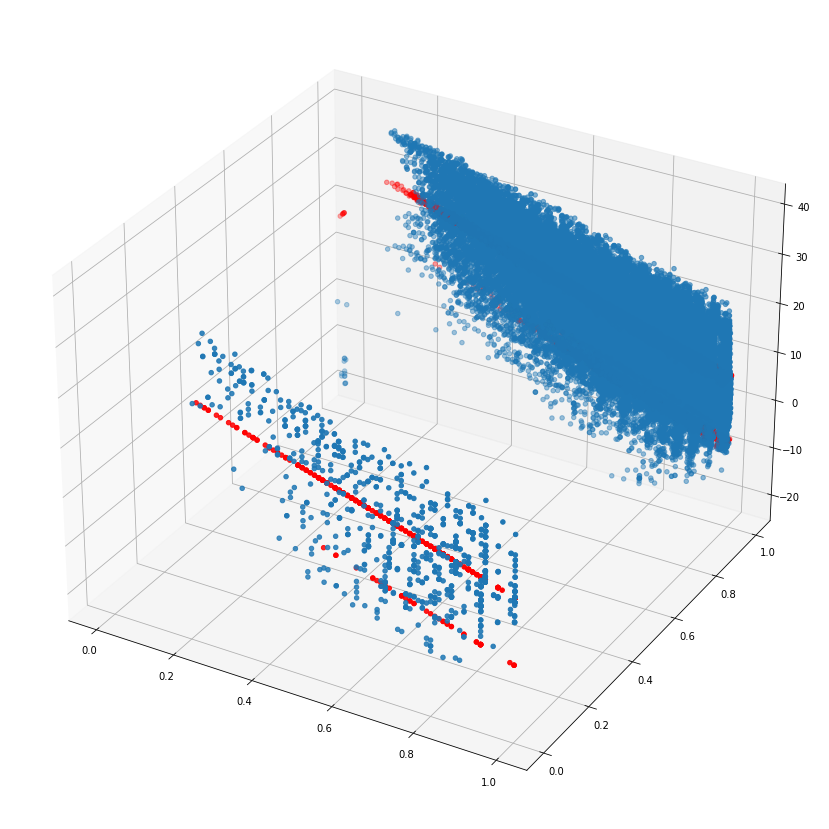

In [96]:
X = weather_ds.drop(columns=['Temperature (C)'])
y = weather_ds['Temperature (C)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
gd = linear.StandardGradientDescent(alpha=0.1, S =600, 
                                   loss = MSE, descent_method='normalization_const')
gd.fit(X_train, y_train)
y_ = gd.predict(X_test)

print(f'MSE = {MSE.get_loss(y_test, y_)}\nMAE = {MAE.get_loss(y_test, y_)}')

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs=X_train['Humidity'], ys=X_train['Pressure'], zs=y_train)
ax.scatter(xs=X_test['Humidity'], ys=X_test['Pressure'], zs=y_, c='red')

Нормировка фичи помогла!!! УРААА

# Stohastic Gradient Descend

MSE = 38.65979706839525
MAE = 5.1463267043688745


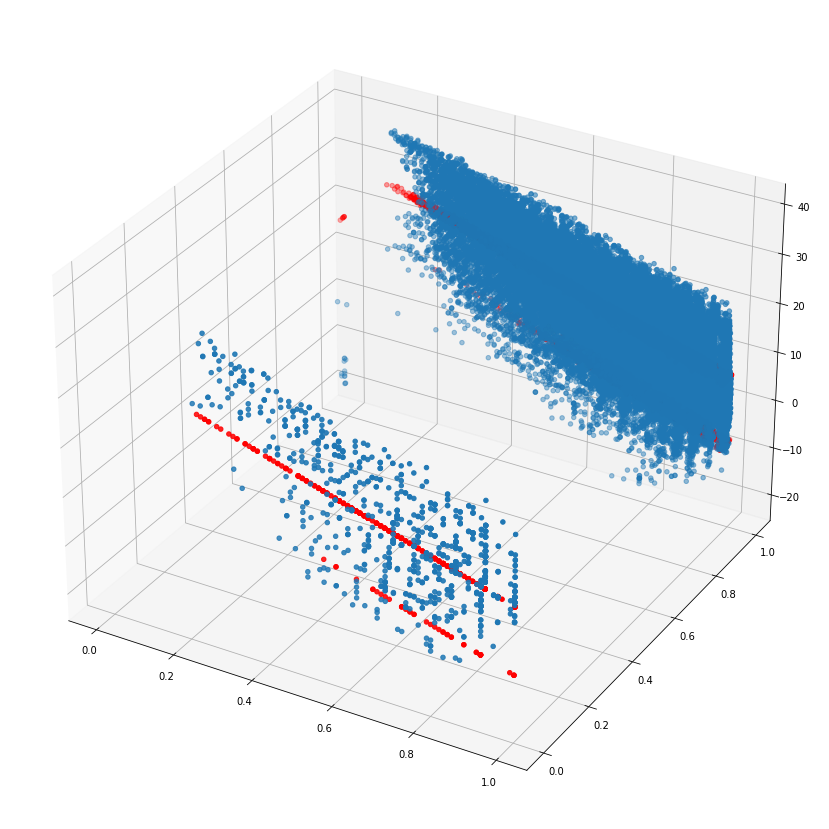

In [97]:
from linear import StochasticGradientDescent
sgd = StochasticGradientDescent(alpha=0.01, eras=5, batch_size=50, tolerance=1, loss=MSE, 
                               descent_method='const')
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
print(f'MSE = {MSE.get_loss(y_test, y_pred)}\nMAE = {MAE.get_loss(y_test, y_pred)}')
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs=X_train['Humidity'], ys=X_train['Pressure'], zs=y_train)
ax.scatter(xs=X_test['Humidity'], ys=X_test['Pressure'], zs=y_pred, c='red')